# Project 1: SAT & ACT Analysis

## Problem Statement

The new format for the SAT was released in March 2016. We track statewide participation and scores; and aim to find influencing factors and draw actionable insights to strategize investment to increase SAT participation rates.

## Executive Summary

In 2018, SAT participation rates see stable improvement in majority of the states, likely due to the SAT School Day program and state mandate of the test to fulfill state accountability, although SAT/ACT disparity still remains between the coastal/midwest region.

The states with low (<10%) SAT participation rates, the SAT scores are much higher (in top 50th percentile) than the rest. This is likely due to self-select bias. In the midwest, where ACT dominates, usually only the students who are applying for private universities take SAT. They took the test to boost their portfolio, so it is natural that they’d only take the test as they believe they will do well. 

For states with either SAT/ACT as the standardized test to fulfill state accountability, we see a better fit of the linear regression for the SAT and ACT score correlation. This suggests that SAT and ACT are aligned to certain level in testing students’ readiness for college.

For states with SAT/ACT as a voluntary option, there is no clear correlation between the SAT and ACT scores. We can’t attribute this ‘randomness’ to the inconsistency between the two test formats, as the testing populations vary from state to state.

As recommmendation, we propose to tailor the approach according to the current state requirement and the intent of the graduating class to take SAT for college admission.


*We also see increase in most of the subject scores. But the comparison of year-over-year results is not within the scope of this analysis as SAT revised the test format in 2016 and the population is still on the way getting accustomized to the content.* 

### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [351]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [352]:
# Load the two datasets for 2017
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [353]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [354]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<div class="alert-success">
<b>Answer</b> 
</div>

**SAT** consists of **51 observations** that represent the 51 states and **5 features(columns)**, namely: 
* State (string)
* Participation (string)
* Evidence-Based Reading and Writing (integer)
* Math (integer)
* Total (integer)

**ACT** consists of **52 observations** that represent the national and the 51 states and **7 features(columns)**, namely:
* State (string)
* Participation (string)
* English (float)
* Math (float)
* Reading (float)
* Science (float)
* Composite (string) <-- this is due to an error and should be corrected

#### 4a. Does the data look complete? 

<div class="alert-success">
<b>Answer</b> 
</div>
There is no missing value in the two datasets, however:
- SAT is less by one 'National' observation than the ACT dataset.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<div class="alert-success">
<b>Answer</b> 
</div>

**SAT**: 

`1` minimum of math is only at 52, much lower even than the 25% percentile at 522. Need to correct it by checking some external resources.


**ACT**: 

`1` the minimum of Science score is abnormally low at 2.30. This appears to come from row 21, Maryland state. It actually should be 23.2 according to the source [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

`2` the data type of Composite is string due to an error in the row 51, Wyoming state.

`3` it has one additional observation at national level.

**Discrepancy**: this may be trivial and doesn't have any impact on the analysis, but the scores are recorded in integer format in SAT and float in ACT. For consistency I will keep float as the format for all scores.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [355]:
# create a copy of the act_2017 dataset for data wrangling purpose
act_2017_new = act_2017.copy()
sat_2017_new = sat_2017.copy()

In [356]:
sat_2017_new.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [357]:
# SAT data - correct the Math score for Maryland
sat_2017_new[sat_2017_new['Math'] == sat_2017_new['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [358]:
sat_2017_new.loc[[20],'Math'] = 524

In [359]:
sat_2017_new.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [360]:
sat_2017_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [361]:
# ACT data - correct the Science score for Maryland
act_2017_new.loc[21,['Science']] = 23.2

In [362]:
act_2017_new.loc[21]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

In [363]:
# ACT data - remove 'x' from the Composite score for Wyoming state
act_2017_new.loc[51,['Composite']] = 20.2

In [364]:
act_2017_new.loc[51]

State            Wyoming
Participation       100%
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

In [365]:
act_2017_new['Composite'] = act_2017_new['Composite'].astype(float)

In [366]:
# ACT data - remove the national observation
act_2017_new = act_2017_new.drop([0],axis=0) 
act_2017_new.head(2)

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


#### 5. What are your data types? 
Display the data types of each feature. 

In [367]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [368]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<div class="alert-success">
<b>Answer</b> 
</div>

* Participation is stored as string, not able to be manipulated as data. This should be changed to float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [369]:
# SAT: change data type of scores from integer to float
sat_2017_new[['Evidence-Based Reading and Writing', 'Math', 'Total']] = sat_2017_new[['Evidence-Based Reading and Writing', 'Math', 'Total']].apply(lambda x: x.astype('float'))

In [370]:
# SAT: change data type of participation from string to float
sat_2017_new['Participation'] = sat_2017_new['Participation'].apply(lambda x: float(x[:-1])) 

In [371]:
# ACT: change data type of participation from string to float
act_2017_new['Participation'] = act_2017_new['Participation'].apply(lambda x: float(x[:-1])) 

In [372]:
# Confirming data types corrected
sat_2017_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [373]:
act_2017_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null float64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [374]:
sat_2017_new.rename(columns = lambda x: 'sat_' + x.strip().lower().replace(" ","_"), inplace=True)

In [375]:
act_2017_new.rename(columns = lambda x: 'act_' + x.strip().lower().replace(" ","_"), inplace=True)

In [376]:
sat_2017_new.head(2)

,sat_state,sat_participation,sat_evidence-based_reading_and_writing,sat_math,sat_total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0


In [377]:
# 'sat_evidence-based_reading_and_writing' is too long, rename it to acronym
sat_2017_new = sat_2017_new.rename(columns={'sat_evidence-based_reading_and_writing': 'sat_ebrw'})

In [378]:
sat_2017_new.head(2)

,sat_state,sat_participation,sat_ebrw,sat_math,sat_total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0


In [379]:
act_2017_new.head(2)

,act_state,act_participation,act_english,act_math,act_reading,act_science,act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**act_state**|*string*|act_2017_new & act_2018_new|Name of the state in the United States| 
|**act_participation**|*float*|act_2017_new & act_2018_new|The percent of students taking ACT in the state (units percent to one decimal place)|
|**act_english**|*float*|act_2017_new & act_2018_new|The average score of English subject for students in this state|
|**act_math**|*float*|act_2017_new & act_2018_new|The average score of Math subject for students in this state|
|**act_reading**|*float*|act_2017_new & act_2018_new|The average score of Reading subject for students in this state|
|**act_science**|*float*|act_2017_new & act_2018_new|The average score of Science subject for students in this state|
|**act_composite**|*float*|act_2017_new & act_2018_new|The average score of Composite subject for students in this state|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat_state**|*string*|sat_2017_new & act_2018_new|Name of the state in the United States| 
|**sat_participation**|*float*|sat_2017_new & act_2018_new|The percent of students taking SAT in the state (units percent to one decimal place)|
|**sat_ebrw**|*float*|sat_2017_new & act_2018_new|The average score of English subject for students in this state|
|**sat_math**|*float*|sat_2017_new & act_2018_new|The average score of Math subject for students in this state|
|**sat_total**|*float*|sat_2017_new & act_2018_new|The average score of Reading subject for students in this state|

#### 9. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [380]:
df_2017 = pd.merge(sat_2017_new, act_2017_new, how='inner', left_on=['sat_state'], right_on=['act_state'])

In [381]:
df_2017.head(2)

,sat_state,sat_participation,sat_ebrw,sat_math,sat_total,act_state,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,Alabama,5.0,593.0,572.0,1165.0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


In [382]:
# drop redundant state column
df_2017.drop(['act_state'],axis=1,inplace=True)

In [383]:
df_2017.rename(columns={'sat_state':'state'}, inplace=True)

In [384]:
df_2017.head(2)

,state,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8


#### 10. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [385]:
df_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In SAT & ACT  Data

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes.

In [386]:
# Load the two datasets for 2018
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [387]:
sat_2018.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


In [388]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [389]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,567.294118,557.254902,1124.666667
std,45.317676,48.887562,93.867069
min,497.000000,480.000000,977.000000
25%,535.000000,521.500000,1062.500000
50%,552.000000,547.000000,1099.000000
75%,616.500000,600.500000,1220.000000
max,643.000000,655.000000,1298.000000


In [390]:
act_2018.head(2)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7


In [391]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
Composite        52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [392]:
act_2018.describe()

,Participation,Composite,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,61.519231,21.473077,20.973077,21.113462,22.001923,21.332692
std,33.757782,2.087696,2.424719,2.017573,2.148186,1.853848
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,29.250000,19.975000,19.100000,19.400000,20.475000,19.925000
50%,65.500000,21.050000,20.200000,20.650000,21.450000,20.950000
75%,100.000000,23.525000,23.700000,23.125000,24.050000,23.025000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### 2. Data Wrangling:

**SAT**

`1.` 'Participation' column in string format. It needs to be changed to float

`2.` Trivial but let's change the data type of scores from integer to float for consistency

**ACT**

`1` Trivial but let's change datatype of participation from integer to float for consistency

`2` Additional 'National' observation is not very useful. Will remove it

In [393]:
# Create new copy of the dataset for data wrangling
act_2018_new = act_2018.copy()
sat_2018_new = sat_2018.copy()

In [394]:
# SAT: change 'Participation' to float
sat_2018_new['Participation'] = sat_2018_new['Participation'].apply(lambda x: float(x[:-1])) 

In [395]:
# SAT: change all score columns to float
sat_2018_new[['Evidence-Based Reading and Writing', 'Math', 'Total']] = sat_2018_new[['Evidence-Based Reading and Writing', 'Math', 'Total']].apply(lambda x: x.astype('float'))

In [396]:
# ACT: change 'Participation' to float
act_2018_new[['Participation']] = act_2018_new[['Participation']].astype(float)

In [397]:
# ACT: drop the 'National' observation
act_2018_new.drop([51],axis=0,inplace=True)

**Rename columns**

In [398]:
sat_2018_new.rename(columns = lambda x: 'sat_' + x.strip().lower().replace(" ","_"), inplace=True)

In [399]:
act_2018_new.rename(columns = lambda x: 'act_' + x.strip().lower().replace(" ","_"), inplace=True)

In [400]:
# 'sat_evidence-based_reading_and_writing' is too long, rename it to acronym
sat_2018_new = sat_2018_new.rename(columns={'sat_evidence-based_reading_and_writing': 'sat_ebrw'})

In [401]:
sat_2018_new.head(2)

,sat_state,sat_participation,sat_ebrw,sat_math,sat_total
0,Alabama,6.0,595.0,571.0,1166.0
1,Alaska,43.0,562.0,544.0,1106.0


In [402]:
act_2018_new.head(2)

,act_state,act_participation,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


In [403]:
df_2018 = pd.merge(sat_2018_new, act_2018_new, how='inner', left_on=['sat_state'], right_on=['act_state'])

In [404]:
df_2018.head(2)

,sat_state,sat_participation,sat_ebrw,sat_math,sat_total,act_state,act_participation,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,6.0,595.0,571.0,1166.0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


In [405]:
# drop redundant state column
df_2018.drop(['act_state'],axis=1,inplace=True)

In [406]:
# rename 'sat_state' column to 'state' column
df_2018.rename(columns={'sat_state':'state'}, inplace=True)

In [407]:
df_2018.head(2)

,state,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [408]:
# add the year to the column names to the two datasets.
df_2017.rename(columns = lambda x: x+'_2017', inplace=True)
df_2018.rename(columns = lambda x: x+'_2018', inplace=True)

In [409]:
# rename back the state column
df_2017.rename(columns = {'state_2017':'state'}, inplace=True)
df_2018.rename(columns = {'state_2018':'state'}, inplace=True)

In [410]:
df_combined = df_2017.merge(df_2018, on='state')

In [411]:
df_combined.head(2)

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,...,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7


In [412]:
df_combined.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [413]:
df_summary = pd.DataFrame(df_combined.describe()).T

In [414]:
df_summary

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ebrw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [415]:
def std_dev(num_list):
    mean = np.mean(num_list)
    squared_diff = 0
    
    for i in num_list:
        squared_diff += (i - mean)**2
    return (squared_diff/len(num_list))**0.5
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [416]:
list(df_combined.columns)

['state',
 'sat_participation_2017',
 'sat_ebrw_2017',
 'sat_math_2017',
 'sat_total_2017',
 'act_participation_2017',
 'act_english_2017',
 'act_math_2017',
 'act_reading_2017',
 'act_science_2017',
 'act_composite_2017',
 'sat_participation_2018',
 'sat_ebrw_2018',
 'sat_math_2018',
 'sat_total_2018',
 'act_participation_2018',
 'act_composite_2018',
 'act_english_2018',
 'act_math_2018',
 'act_reading_2018',
 'act_science_2018']

In [417]:
sd = {k:'{0:.2f}'.format(std_dev(df_combined[k])) for k in list(df_combined.columns) if df_combined[k].dtype == np.float64 or df_combined[k].dtype == np.int64}

In [418]:
sd

{'sat_participation_2017': '34.93',
 'sat_ebrw_2017': '45.22',
 'sat_math_2017': '46.66',
 'sat_total_2017': '91.58',
 'act_participation_2017': '31.82',
 'act_english_2017': '2.33',
 'act_math_2017': '1.96',
 'act_reading_2017': '2.05',
 'act_science_2017': '1.72',
 'act_composite_2017': '2.00',
 'sat_participation_2018': '37.64',
 'sat_ebrw_2018': '44.87',
 'sat_math_2018': '48.41',
 'sat_total_2018': '92.94',
 'act_participation_2018': '33.75',
 'act_composite_2018': '2.09',
 'act_english_2018': '2.42',
 'act_math_2018': '2.02',
 'act_reading_2018': '2.15',
 'act_science_2018': '1.85'}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<div class="alert-success">
<b>Answer</b> 
</div> 

No, the manually calculated standard deviations are different from the pandas `describe`. Pandas dataframe.std() function return sample standard deviation, where the standard deviations are normalized by N-1 for unbiased estimated of sample. On the other hand, the manual calculation population standard deviations are normalized by N.

#### Investigate trends in the data

Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT: 
        - `highest (100%)`: Connecticut, Delaware, District of Columbia, Michigan; 
        - `lowest (2%)`: Iowa, Mississippi, North Dakota
    - 2018 SAT? 
        - `highest (100%)`: Colorado, Connecticut, Delaware, Idaho, Michigan; 
        - `lowest (2%)`: North Dakota
    - 2017 ACT?
        - `highest (100%)`: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming; 
        - `lowest (8%)`: Maine
    - 2018 ACT?
        - `highest (100%)`: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming; 
        - `lowest (8%)`: Maine
        

Here we see clear disparity in the ACT/SAT participation rates among the states. Some history and background could be easily found from online, e.g. [this post](https://www.washingtonpost.com/news/answer-sheet/wp/2016/02/03/dad-my-state-now-requires-11th-graders-to-take-the-sat-not-my-daughter/?noredirect=on&utm_term=.97e5c8ae236d) Education Week reports that the U.S. Department of Education has given seven states permission to use the ACT or the SAT for federal accountability purposes, with Arkansas, Wisconsin and Wyoming using the former, and Colorado, Connecticut, Maine and New Hampshire using the latter. (Colorado had been using the ACT — which overtook the SAT as the most popular college admissions test in 2012 — but just changed to the SAT.)
 
 
-------
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT:
        - `highest (1295, participation 3%)`: Minnesota; 
        - `lowest (950, participation 100%)`: District of Columbia
    - 2018 SAT:
        - `highest (1298, participation 4%)`: Minnesota; 
        - `lowest (977, participation 92%)`: District of Columbia
    - 2017 ACT:
        - `highest (25.5, participation 18%)`: New Hampshire; 
        - `lowest (17.8, participation 100%)`: Nevada    
    - 2018 ACT:
        - `highest (25.6, participation 26%)`: Connecticut; 
        - `lowest (17.7, participation 100%)` : Nevada
        
An interesting obervation that the scores seem to inversely correlate to the participation rates. There are also a lot of online posts that discussed the underlying reasons for this behavior. [this post](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) and [this post](https://economix.blogs.nytimes.com/2009/08/28/why-the-midwest-rules-on-the-sat/) 

-------
        
- Do any states with 100% participation on a given test have a rate change year-to-year?
The two tables below show the states with 100% participation rates. **NaN** means the state didn't achieve 100% participation during that year.

`Colorado` is worth some attention here as it has flipped from 100% ACT participation in year 2017 to 100% SAT participation in year 2018. Based on the source here Colorado has made it 

|sat_2017|sat_2018|
|--------|--------|
|District of Columbia|	NaN|
|NaN|Colorado|
|NaN|Idaho|


|act_2017|act_2018|
|--------|--------|
|Colorado|NaN|
|Minnesota|NaN|
|NaN|Nebraska|
|NaN|Ohio|

-------

- Do any states have >50% participation on *both* tests either year?

These are the states that have >50% participation on both tests either year: **Florida, Georgia, Hawaii, North Carolina, South Carolina**

-------



In [419]:
### Bits and pieces of code to answer the questions above

In [420]:
# Using mask, show the states that have the highest 2017 SAT participation rates
df_combined[df_combined['sat_participation_2017'] == df_combined['sat_participation_2017'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,100.0,511.0,499.0,1011.0,22.0,24.4,24.5,23.9,24.7,23.9


These states are likely to have mandated SAT as compulsory test for state accountability purposes.

In [421]:
# Use sorting, show the states that have the lowest 2017 SAT participation rates
df_combined.sort_values(["sat_participation_2017"], ascending=True).head(5)

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,...,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,...,3.0,634.0,631.0,1265.0,68.0,21.8,21.0,21.2,22.5,22.0
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,...,4.0,618.0,612.0,1230.0,100.0,20.4,19.7,19.9,20.9,20.5


These states are likely to have either mandated ACT as compulsory test or come with mostly public universities in the states.

In [422]:
# States that have the highest 2018 SAT participation rates
df_combined[df_combined['sat_participation_2018'] == df_combined['sat_participation_2018'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,...,100.0,508.0,493.0,1001.0,36.0,22.3,21.9,21.6,23.2,22.1
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,100.0,511.0,499.0,1011.0,22.0,24.4,24.5,23.9,24.7,23.9


These states are likely to have mandated SAT as compulsory test for state accountability purposes. Colorado is a new addition in 2018.

In [423]:
# States that have the lowest 2018 SAT participation rates
df_combined[df_combined['sat_participation_2018'] == df_combined['sat_participation_2018'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,...,2.0,640.0,643.0,1283.0,98.0,20.3,19.1,20.3,20.7,20.5


These states are likely to have either mandated ACT as compulsory test or come with mostly public universities in the states.

In [424]:
# States that have the highest 2017 ACT participation rates
df_combined[df_combined['act_participation_2017'] == df_combined['act_participation_2017'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
17,Kentucky,4.0,631.0,616.0,1247.0,100.0,19.6,19.4,20.5,20.1,...,4.0,630.0,618.0,1248.0,100.0,20.2,19.9,19.7,20.8,20.1
18,Louisiana,4.0,611.0,586.0,1198.0,100.0,19.4,18.8,19.8,19.6,...,4.0,615.0,595.0,1210.0,100.0,19.2,19.0,18.5,19.6,19.1
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
26,Montana,10.0,605.0,591.0,1196.0,100.0,19.0,20.2,21.0,20.5,...,10.0,606.0,592.0,1198.0,100.0,20.0,18.7,19.9,20.7,20.0
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9


These states are likely to have mandated ACT as compulsory test for state accountability purposes. There are 17 of this kind in 2017.

In [425]:
# States that have the lowest 2017 ACT participation rates
df_combined[df_combined['act_participation_2017'] == df_combined['act_participation_2017'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,99.0,512.0,501.0,1013.0,7.0,24.0,23.8,23.6,24.7,23.4


Maine is likely to have mandated SAT as the compulsory test for all graduating students.

In [426]:
# States that have the highest 2018 ACT participation rates
df_combined[df_combined['act_participation_2018'] == df_combined['act_participation_2018'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
17,Kentucky,4.0,631.0,616.0,1247.0,100.0,19.6,19.4,20.5,20.1,...,4.0,630.0,618.0,1248.0,100.0,20.2,19.9,19.7,20.8,20.1
18,Louisiana,4.0,611.0,586.0,1198.0,100.0,19.4,18.8,19.8,19.6,...,4.0,615.0,595.0,1210.0,100.0,19.2,19.0,18.5,19.6,19.1
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
26,Montana,10.0,605.0,591.0,1196.0,100.0,19.0,20.2,21.0,20.5,...,10.0,606.0,592.0,1198.0,100.0,20.0,18.7,19.9,20.7,20.0
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,...,3.0,629.0,623.0,1252.0,100.0,20.1,19.4,19.8,20.4,20.1
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9
33,North Carolina,49.0,546.0,535.0,1081.0,100.0,17.8,19.3,19.6,19.3,...,52.0,554.0,543.0,1098.0,100.0,19.1,18.0,19.3,19.5,19.2


These states are likely to have mandated ACT as compulsory test for state accountability purposes. There are still 17 of this kind in 2018.

In [427]:
# States that have the lowest 2018 ACT participation rates
df_combined[df_combined['act_participation_2018'] == df_combined['act_participation_2018'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
19,Maine,95.0,513.0,499.0,1012.0,8.0,24.2,24.0,24.8,23.7,...,99.0,512.0,501.0,1013.0,7.0,24.0,23.8,23.6,24.7,23.4


In [428]:
# States that have the highest 2017 SAT mean total score
df_combined[df_combined['sat_total_2017'] == df_combined['sat_total_2017'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4


In [429]:
# States that have the lowest 2017 SAT mean total score
df_combined[df_combined['sat_total_2017'] == df_combined['sat_total_2017'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0


In [430]:
# States that have the highest 2018 SAT mean total score
df_combined[df_combined['sat_total_2018'] == df_combined['sat_total_2018'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4


In [431]:
# States that have the lowest 2018 SAT mean total score
df_combined[df_combined['sat_total_2018'] == df_combined['sat_total_2018'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0


In [432]:
# States that have the highest 2017 ACT mean total score
df_combined[df_combined['act_composite_2017'] == df_combined['act_composite_2017'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
29,New Hampshire,96.0,532.0,520.0,1052.0,18.0,25.4,25.1,26.0,24.9,...,96.0,535.0,528.0,1063.0,16.0,25.1,25.1,24.7,25.6,24.4


In [433]:
# States that have the lowest 2017 ACT mean total score
df_combined[df_combined['act_composite_2017'] == df_combined['act_composite_2017'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9


In [434]:
# States that have the highest 2018 ACT mean total score
df_combined[df_combined['act_composite_2018'] == df_combined['act_composite_2018'].max()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9


In [435]:
# States that have the lowest 2017 ACT mean total score
df_combined[df_combined['act_composite_2018'] == df_combined['act_composite_2018'].min()]

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
28,Nevada,26.0,563.0,553.0,1116.0,100.0,16.3,18.0,18.1,18.2,...,23.0,574.0,566.0,1140.0,100.0,17.7,16.6,17.8,18.0,17.9


#### Below is some extra code to create a dataframe to store the states with 100% participation rate and have a change year-to-year to answer [question above](#investigate-trends-in-the-data)

In [436]:
# Extract the states that have 100% participation rates and store them as individual dataframes

df_100_sat_2017 = pd.DataFrame(list(df_combined.query('sat_participation_2017 == 100')['state']),columns=['sat_2017'])
df_100_sat_2018 = pd.DataFrame(list(df_combined.query('sat_participation_2018 == 100')['state']),columns=['sat_2018'])
df_100_act_2017 = pd.DataFrame(list(df_combined.query('act_participation_2017 == 100')['state']),columns=['act_2017'])
df_100_act_2018 = pd.DataFrame(list(df_combined.query('act_participation_2018 == 100')['state']),columns=['act_2018'])

In [437]:
df_100_sat = pd.merge(df_100_sat_2017,df_100_sat_2018, how = 'outer', left_on = 'sat_2017', right_on = 'sat_2018')

In [438]:
df_100_sat.query('sat_2017 != sat_2018')

,sat_2017,sat_2018
2,District of Columbia,NaN
4,NaN,Colorado
5,NaN,Idaho


In [439]:
df_100_act = pd.merge(df_100_act_2017,df_100_act_2018, how = 'outer', left_on = 'act_2017', right_on = 'act_2018')

In [440]:
df_100_act.query('act_2017 != act_2018')

,act_2017,act_2018
2,Colorado,NaN
5,Minnesota,NaN
17,NaN,Nebraska
18,NaN,Ohio


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [441]:
def heatMap(df, mirror = False):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(15, 15))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

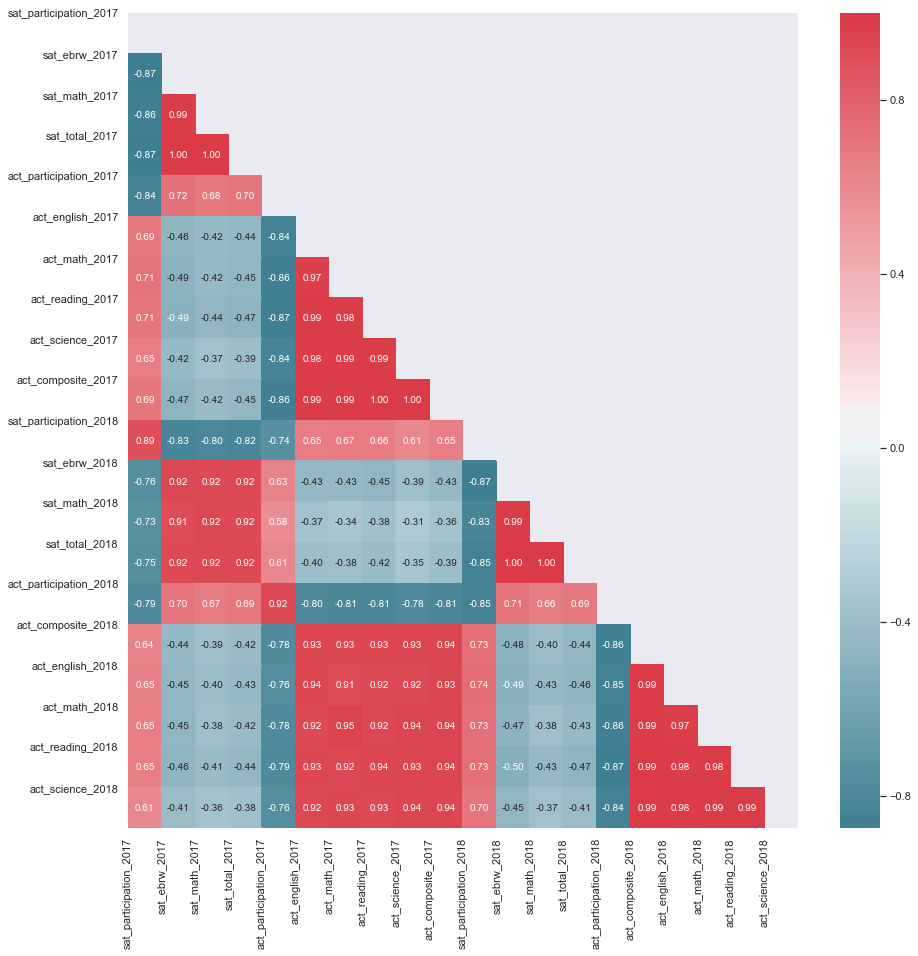

In [442]:
heatMap(df_combined)

<font color=blue><b>Observations</b></font>

`1.` In general, the 2017 and 2018 participation rates still show a positive correlation for both SAT and ACT.

`2.` The scores seem to be negatively correlated to the participation rates. This [blog post](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) explains well the self-select bias. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [443]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,15)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace=1.0, left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], bins=10, ax=ax[i], axlabel=list_of_columns[i])        
    

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

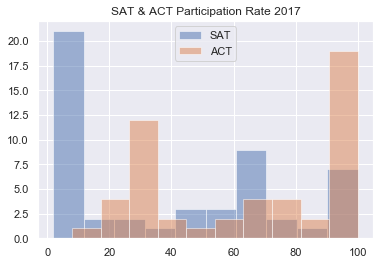

In [444]:
# ACT & SAT participation rates on the same graph
plt.hist(df_combined["sat_participation_2017"], alpha=0.5, label='SAT')
plt.hist(df_combined["act_participation_2017"], alpha=0.5, label='ACT')
plt.legend()
plt.title("SAT & ACT Participation Rate 2017")
plt.show();

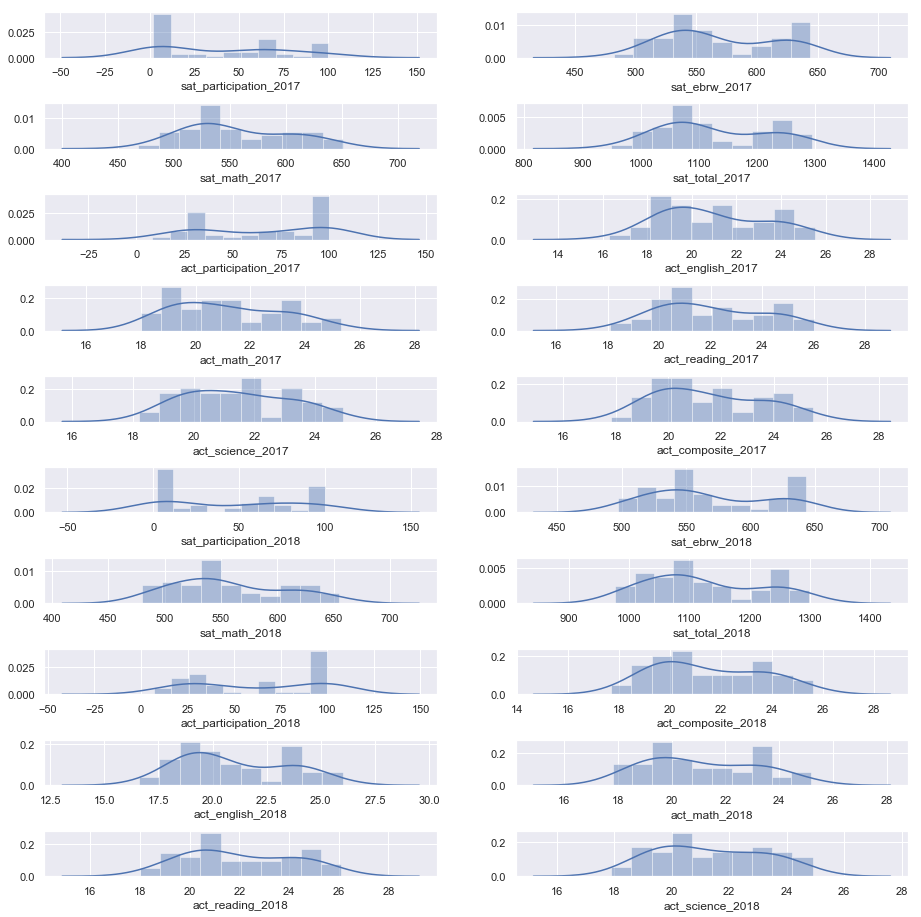

In [445]:
# Plot histograms for all variables
column_names = ['sat_participation_2017',
 'sat_ebrw_2017',
 'sat_math_2017',
 'sat_total_2017',
 'act_participation_2017',
 'act_english_2017',
 'act_math_2017',
 'act_reading_2017',
 'act_science_2017',
 'act_composite_2017',
 'sat_participation_2018',
 'sat_ebrw_2018',
 'sat_math_2018',
 'sat_total_2018',
 'act_participation_2018',
 'act_composite_2018',
 'act_english_2018',
 'act_math_2018',
 'act_reading_2018',
 'act_science_2018']

title_names = []
xlabels = []
subplot_histograms(df_combined, column_names, title_names, xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


*Plot 1: SAT vs. ACT math scores for 2017*

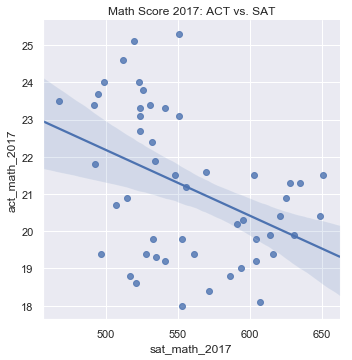

In [446]:
sns.lmplot(x="sat_math_2017", y="act_math_2017", data=df_combined)
ax = plt.gca()
ax.set_title("Math Score 2017: ACT vs. SAT");

*Plot 2: SAT vs. ACT verbal/reading scores for 2017*

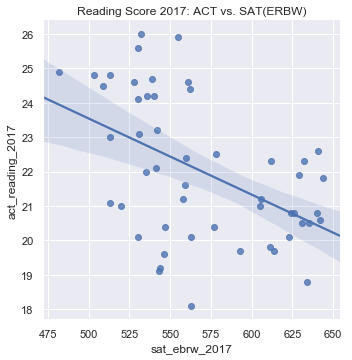

In [447]:
sns.lmplot(x="sat_ebrw_2017", y="act_reading_2017", data=df_combined)
ax = plt.gca()
ax.set_title("Reading Score 2017: ACT vs. SAT(ERBW)");

*Plot 3: SAT vs. ACT total/composite scores for 2017*

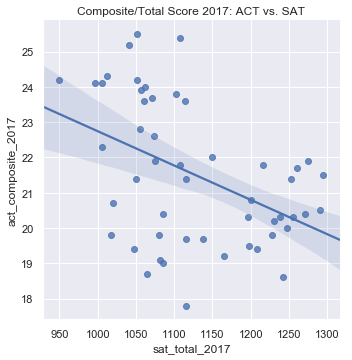

In [448]:
sns.lmplot(x="sat_total_2017", y="act_composite_2017", data=df_combined)
ax = plt.gca()
ax.set_title("Composite/Total Score 2017: ACT vs. SAT");

*Plot 4: Total scores for SAT 2017 vs. 2018*

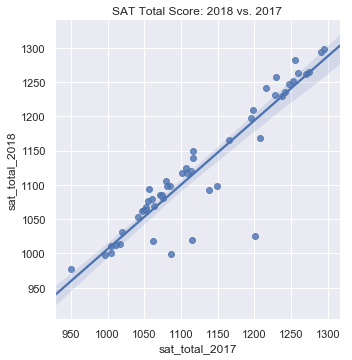

In [449]:
sns.lmplot(x="sat_total_2017", y="sat_total_2018", data=df_combined)
ax = plt.gca()
ax.set_title("SAT Total Score: 2018 vs. 2017");

*Plot 5: Composite scores for ACT 2017 vs. 2018:*

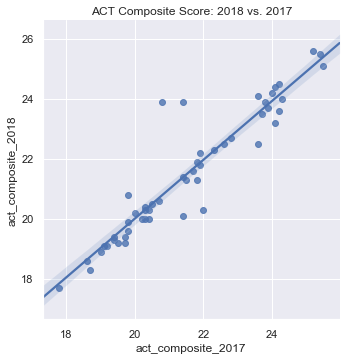

In [450]:
sns.lmplot(x="act_composite_2017", y="act_composite_2018", data=df_combined)
ax = plt.gca()
ax.set_title("ACT Composite Score: 2018 vs. 2017");

*Plot 6: SAT 2018 participation rates vs. SAT 2017 participation rates*

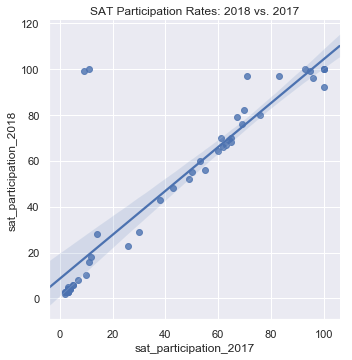

In [451]:
sns.lmplot(x="sat_participation_2017", y="sat_participation_2018", data=df_combined)
ax = plt.gca()
ax.set_title("SAT Participation Rates: 2018 vs. 2017");

In [452]:
df_combined.query('sat_participation_2017 < 20 & sat_participation_2018 > 90')

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
13,Illinois,9.0,559.0,556.0,1115.0,93.0,21.0,21.2,21.6,21.3,...,99.0,513.0,506.0,1019.0,43.0,23.9,24.1,23.4,24.2,23.4


In [453]:
df_combined.query('sat_participation_2017 > 70 & sat_participation_2017 < 90 & sat_participation_2018 > 90')

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
9,Florida,83.0,520.0,497.0,1017.0,73.0,19.0,19.4,21.0,19.4,...,97.0,522.0,493.0,1014.0,66.0,19.9,19.2,19.3,21.1,19.5
39,Rhode Island,71.0,539.0,524.0,1062.0,21.0,24.0,23.3,24.7,23.4,...,97.0,513.0,505.0,1018.0,15.0,24.2,24.4,23.6,25.0,23.5


*Plot 7: ACT 2018 participation rates vs. ACT 2017 participation rates*

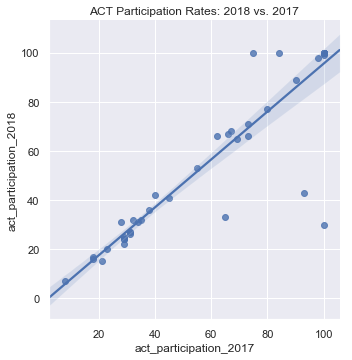

In [454]:
sns.lmplot(x="act_participation_2017", y="act_participation_2018", data=df_combined)
ax = plt.gca()
ax.set_title("ACT Participation Rates: 2018 vs. 2017");

*Plot 8: SAT 2017 math score vs. SAT 2017 participation rates*

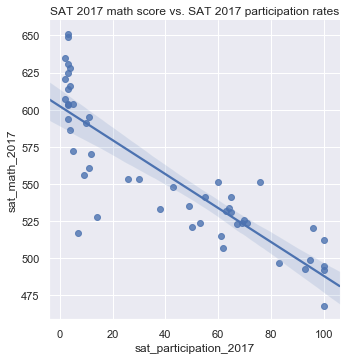

In [455]:
sns.lmplot(x="sat_participation_2017", y="sat_math_2017", data=df_combined)
ax = plt.gca()
ax.set_title("SAT 2017 math score vs. SAT 2017 participation rates");

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [456]:
high = ['sat_total_2017','sat_total_2018']
mid = ['sat_ebrw_2017','sat_math_2017','sat_ebrw_2018','sat_math_2018']
low = ['act_composite_2017','act_english_2017','act_math_2017','act_reading_2017','act_science_2017',
      'act_composite_2018','act_english_2018','act_math_2018','act_reading_2018','act_science_2018']
participation = ['sat_participation_2017','act_participation_2017','sat_participation_2018','act_participation_2018']

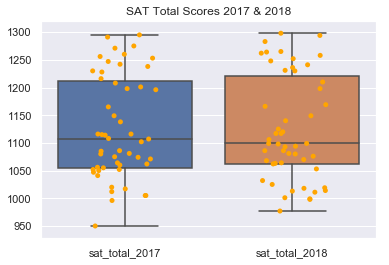

In [457]:
# Highest scale

ax = sns.boxplot(data=df_combined[high])
ax = sns.stripplot(data=df_combined[high], color="orange", jitter=0.2, size=5)
plt.title("SAT Total Scores 2017 & 2018", loc="center");

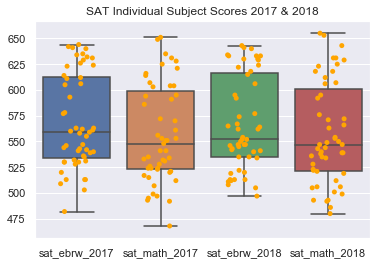

In [458]:
# Medium scale

ax = sns.boxplot(data=df_combined[mid])
ax = sns.stripplot(data=df_combined[mid], color="orange", jitter=0.2, size=5)
plt.title("SAT Individual Subject Scores 2017 & 2018", loc="center");

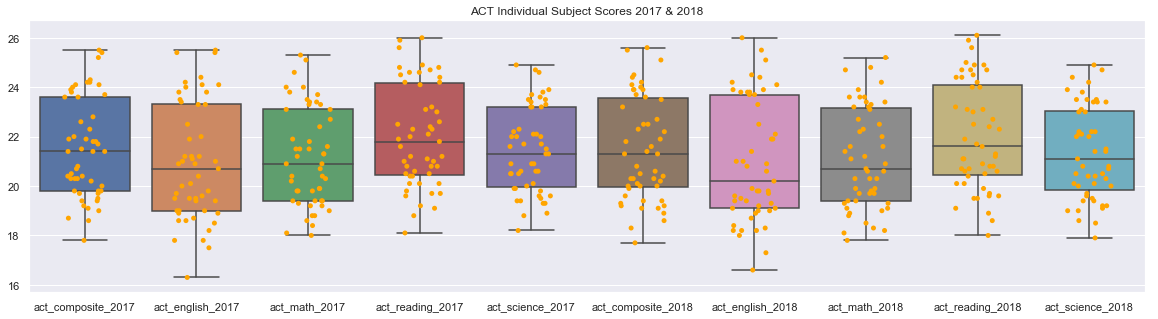

In [459]:
# Low scale
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(ax=ax, data=df_combined[low])
ax = sns.stripplot(data=df_combined[low], color="orange", jitter=0.2, size=5)
plt.title("ACT Individual Subject Scores 2017 & 2018", loc="center");

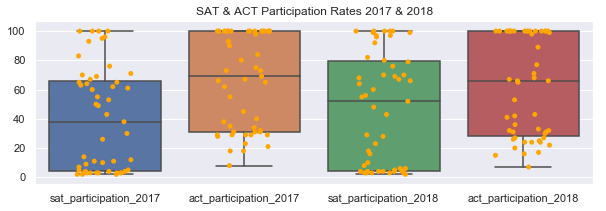

In [460]:
# Participation
fig, ax = plt.subplots(figsize=(10,3))
ax = sns.boxplot(ax=ax, data=df_combined[participation])
ax = sns.stripplot(data=df_combined[participation], color="orange", jitter=0.2, size=5)
plt.title("SAT & ACT Participation Rates 2017 & 2018", loc="center");

In 2017, there are more states that have 100% ACT participation rates as compared to SAT.

In 2018, there seems more states that have switched over from ACT to SAT.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Increment of SAT Participation Rates in Year 2018 Over Year 2017

The map below shows that SAT participation saw increase in majority of the states.

![image info](../data/SAT_delta.png)

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

Plot below shows that SAT is more common in the states in East Coast and West Coast area. Students in the Midwest/Plains area were least likely to take the test.

![image info](../data/sat_participation_2017.png)

Plot below shows that Colorado and Illinois flips from one digit participate rate to almost 100% in 2018

![alt text](../data/sat_participation_2018.png)

For the SAT total score, it seems on the reverse, i.e. when SAT participation is high, the score is on the lower side.

![alt text](../data/sat_total_2017.png)

The ACT has greater adoption in the South and Midwest. 

![image info](../data/act_participation_2017.png)

Same observation as SAT, but just in the reverse direction, Colorado and Illinois showed decline in ACT participation.

![image info](../data/act_participation_2018.png)

Similarly for the ACT composite score, it seems on the reverse of the participation rates - the score seems higher where states where participation is low

![image info](../data/act_composite_2017.png)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<div class="alert-success">
<b>Answer</b> 
</div>

   - Most of the variables display bi-modal distributions. Deep-dive into the two modes, it seems that the distribution could be related to the policy in that state - states that mandate certain test (or majority taking the test for some historical reasons) comprise most of the distribution around the left mode, and states where less people taking the test comprise the distribution around the right mode.
   
   - The same observation applies to all variables.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<div class="alert-success">
<b>Answer</b> 
</div>

**Not really**. The sampling means didn't seem to follow a normal distribution. This is probably because the sampling mean is not collected by random sampling, i.e. ideally the sampling mean should be calculated by bootstrapping the student scores nationwide.

We can't use the state mean to estimate the national mean. One workaround solution is probably dividing the states into a few groups, and estimate the mean for each group. However this also comes at compromise that the sample size is reduced. Another alternative is to sample individuals from all the states and estimate the mean.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

<div class="alert-success">
<b>Answer</b> 
</div>

It is **NOT** advisable to generalize the relationship between SAT and ACT participation rates with the current data. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

<div class="alert-success">
<b>Answer</b> 
</div>

It is **NOT** appropriate to compare the specific SAT and ACT math scores, as there is a bias among students who decided to take SAT and those who chose to take ACT. To overcome this and explore the correlation between ACT and SAT scores, a more appropriate way is to apply random sampling to individuals who have taken both ACT and SAT in the US nationwide. This would reflect the correlation on students who decided to take both and stay away from the self-select bias.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

<div class="alert-success">
<b>Answer</b> 
</div>

**NOT** pursuing statisitcal evaluation to run hypothesis test here as the sample size here is too small. Firstly it is not right to make inference on national-level parameters here as we don't really have a randomly collected sample. Even if we limit our scope to make inference on certain type of states, say, states which mandate SAT/ACT as compulsory, we are quite restricted by the sample size, no matter how we categorize it, we won't be able to get a sample with >30 states that is sufficiently homogeneous to represent the group.

In [461]:
df_combined.query('act_participation_2018 == 100 | act_participation_2017 == 100')

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,...,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,...,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
17,Kentucky,4.0,631.0,616.0,1247.0,100.0,19.6,19.4,20.5,20.1,...,4.0,630.0,618.0,1248.0,100.0,20.2,19.9,19.7,20.8,20.1
18,Louisiana,4.0,611.0,586.0,1198.0,100.0,19.4,18.8,19.8,19.6,...,4.0,615.0,595.0,1210.0,100.0,19.2,19.0,18.5,19.6,19.1
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,...,4.0,643.0,655.0,1298.0,99.0,21.3,20.2,21.4,21.7,21.4
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,...,3.0,630.0,606.0,1236.0,100.0,18.6,18.2,18.1,18.9,18.6
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,...,4.0,633.0,629.0,1262.0,100.0,20.0,19.5,19.7,20.5,20.0
26,Montana,10.0,605.0,591.0,1196.0,100.0,19.0,20.2,21.0,20.5,...,10.0,606.0,592.0,1198.0,100.0,20.0,18.7,19.9,20.7,20.0
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,...,3.0,629.0,623.0,1252.0,100.0,20.1,19.4,19.8,20.4,20.1


19 rows only, sample size too small to perform bootstrapping

In [462]:
df_combined.query('sat_participation_2018 == 100 | sat_participation_2017 == 100')

,state,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
5,Colorado,11.0,606.0,595.0,1201.0,100.0,20.1,20.3,21.2,20.9,...,100.0,519.0,506.0,1025.0,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530.0,512.0,1041.0,31.0,25.5,24.6,25.6,24.6,...,100.0,535.0,519.0,1053.0,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503.0,492.0,996.0,18.0,24.1,23.4,24.8,23.6,...,100.0,505.0,492.0,998.0,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,100.0,482.0,468.0,950.0,32.0,24.4,23.5,24.9,23.5,...,92.0,497.0,480.0,977.0,32.0,23.6,23.7,22.7,24.4,23.0
12,Idaho,93.0,513.0,493.0,1005.0,38.0,21.9,21.8,23.0,22.1,...,100.0,508.0,493.0,1001.0,36.0,22.3,21.9,21.6,23.2,22.1
22,Michigan,100.0,509.0,495.0,1005.0,29.0,24.1,23.7,24.5,23.8,...,100.0,511.0,499.0,1011.0,22.0,24.4,24.5,23.9,24.7,23.9


6 rows only, sample size too small to perform bootstrapping

## Outside Research

<div class="alert-success">
<b>Answer</b> 
</div>

SAT participation rates increased greatly in Colorado, Illionois, Florida in 2018. 
Research showed that this could be mainly due to 1) school day exam; 2) winning state-level contract.

For example in Florida, officials attributed the increase to many school districts, including those in Central Florida, offering free SAT “school day” events, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents. [Source 1](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html) 

In Colorado and Illinois, the participation flipped from 100% ACT in 2017 to almost 100% SAT in 2018. While ACT had already lost its contracts with Alaska, Colorado, Michigan, and Illinois by 2017, the full impact of the changeover from ACT to SAT could several years to play out. [Source 2](https://www.compassprep.com/the-unofficial-take-on-acts-college-and-career-readiness-report-2018/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### Key Takeaways:

`1.` Seemingly inverse correlation (not causation) between score and participation rates: self-select bias

`2.` Scores follow a bi-modal distribution - this is likely to the disparity in the test offering: in some states, one test is mandated as compulsory for all students for state accountability; while in other states the test is offered as an option.

`3.` There is some consistency in the performance of the states, i.e. the states which had higher state average scores tend to also do better in 2018.

`4.` Increase in SAT participation in 68% of the states (94% greater than or equal to)

`5.` The ACT has greater adoption in the South and Midwest and SAT higher near the coasts (especially east coast, plus California and Washington. Historical/geographical reasons: 1) ACT is widely accepted as entrance exam to public schools while SAT is mostly required (previously) by the private schools which are near the east coast



#### Recommendations:

Case by case:

`1.` <span style="color:rgb(162, 188, 229)">**States with organically higher SAT participation rates**</span>
    
    There is great demand for SAT in these states to meet the admission requirement. Increase test centres, continue to promote SAT School Day program or increase SAT test centres when there is a growing demand.

`2.` <span style="color:rgb(211, 112, 35)">**States with ACT mandate**</span>
    
    It could be more difficult to push SAT in these states as policies have been laid out. In the short term, target at schools with students likely to apply for private universities with promotion programs (e.g. SAT School Day, free SAT). In the long run, 1) coorporate with the state government for SAT contract; 2) tweak SAT content to make it suitable for public school admission.

`3.` <span style="color:rgb(249, 209, 177)">**States without ACT mandate yet having low SAT participation rates**</span> 
    
    Especially South Dakota, Iowa, Kansas in the mid-west that come with the highest disparity. Probably need to work even harder to firstly persuade the government to reinstate the importance of tertiary education and make college admission test compulsory as state accountability. Following suit, actions could be taken to increase the SAT participation rates similar to the above. Historically these states have had high preference over ACT. (ACT was invented in University of Iowa!)
    
  

![image info](../data/sat_2018_mandates.png)

#### Additional Data:

`1.` Number of students per state, so that the action items could be prioritized towards the state with large size of graduating class.

`2.` Catogorization of the state policy of college admission test, e.g. is it compulsory, which one, is it free et, so that a fairer comparison could be drawn between ACT and SAT scores.

`3.` Accessibility to SAT test centres - hypothesis that states with less SAT test centres or in-accessible test centre locations tend to have low participation rates [Additional plot at the end of notebook for test centre map](https://www.compassprep.com/august-sat-limited-center-availability/)

`4.` Income level (adjusted by cost-of-living of the state) - hypothesis that states with high income level may tend to take both tests?

Image below from online source shows that SAT test centres cluster around the west and east coasts. Will it be possible to bring more test centres where we saw increase in SAT participation rates in 2018?

![image info](../data/sat_test_centre.png)

`**References**`: 

**SAT/ACT background related**

[ACT 2018 individual subject score by state](https://magoosh.com/hs/act/2016/average-act-score-by-state/)

[SAT Scores See Slight Increase as Test-Taking Surges](https://blogs.edweek.org/edweek/high_school_and_beyond/2018/10/more_than_2_million_students_take_the_sat.html)

[Where the SAT and ACT Dominate](https://archive.nytimes.com/www.nytimes.com/interactive/2013/08/04/education/edlife/where-the-sat-and-act-dominate.html)

[What Tests Does Each State Require?](https://www.edweek.org/ew/section/multimedia/what-tests-does-each-state-require.html)

[Which States Require the ACT? Full List and Advice](https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)

[Which States Require the SAT? Complete List](https://blog.prepscholar.com/which-states-require-the-sat)

[The Unofficial Take on ACT’s College and Career Readiness Report 2018](https://www.compassprep.com/the-unofficial-take-on-acts-college-and-career-readiness-report-2018/)

[August SAT Centers. Overpacking for Summer.](https://www.compassprep.com/august-sat-limited-center-availability/)

[Why the Midwest Rules on the SAT](https://economix.blogs.nytimes.com/2009/08/28/why-the-midwest-rules-on-the-sat/)


**EDA related**

[Generating Correlation Heat Maps in Seaborn](https://ajh1143.github.io/Corr/)
